In [9]:
import numpy as np
import matplotlib.pyplot as plt

In [10]:
x = np.arange(100)
delta = np.random.uniform(-10, 10, size=(100,))
m = 0.4
b = 20.0
y = m * x + b + delta

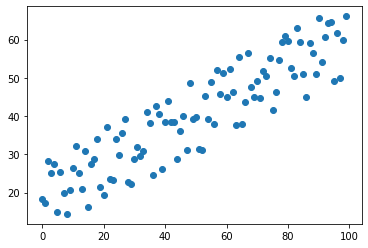

In [11]:
plt.scatter(x, y)

In [12]:
from sklearn import linear_model

In [13]:
regModel = linear_model.LinearRegression()
regModel.fit(x.reshape((100, 1)), y)

print(f'Slopes: {regModel.coef_}')
print(f'Intercepts: {regModel.intercept_}')

Slopes: [0.42452011]
Intercepts: 19.251858716879653


In [14]:
import pandas as pd

In [15]:
url = "https://raw.githubusercontent.com/lmcanavals/ml/main/data/machine.data"

data = pd.read_csv(url, header=None)
data.head()

,0,1,2,3,4,5,6,7,8,9
0,adviser,32/60,125,256,6000,256,16,128,198,199
1,amdahl,470v/7,29,8000,32000,32,8,32,269,253
2,amdahl,470v/7a,29,8000,32000,32,8,32,220,253
3,amdahl,470v/7b,29,8000,32000,32,8,32,172,253
4,amdahl,470v/7c,29,8000,16000,32,8,16,132,132


In [16]:
# data = pd.read_csv("machine.data", header=None)
# data.head()

In [17]:
data.describe()

,2,3,4,5,6,7,8,9
count,209.000000,209.000000,209.000000,209.000000,209.000000,209.000000,209.000000,209.000000
mean,203.822967,2867.980861,11796.153110,25.205742,4.698565,18.267943,105.622010,99.330144
std,260.262926,3878.742758,11726.564377,40.628722,6.816274,25.997318,160.830733,154.757102
min,17.000000,64.000000,64.000000,0.000000,0.000000,0.000000,6.000000,15.000000
25%,50.000000,768.000000,4000.000000,0.000000,1.000000,5.000000,27.000000,28.000000
50%,110.000000,2000.000000,8000.000000,8.000000,2.000000,8.000000,50.000000,45.000000
75%,225.000000,4000.000000,16000.000000,32.000000,6.000000,24.000000,113.000000,101.000000
max,1500.000000,32000.000000,64000.000000,256.000000,52.000000,176.000000,1150.000000,1238.000000


In [18]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 209 entries, 0 to 208
Data columns (total 10 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   0       209 non-null    object
 1   1       209 non-null    object
 2   2       209 non-null    int64 
 3   3       209 non-null    int64 
 4   4       209 non-null    int64 
 5   5       209 non-null    int64 
 6   6       209 non-null    int64 
 7   7       209 non-null    int64 
 8   8       209 non-null    int64 
 9   9       209 non-null    int64 
dtypes: int64(8), object(2)
memory usage: 16.5+ KB


## Setup Data

In [19]:
X = data[data.columns[2: 9]]
X.head()

,2,3,4,5,6,7,8
0,125,256,6000,256,16,128,198
1,29,8000,32000,32,8,32,269
2,29,8000,32000,32,8,32,220
3,29,8000,32000,32,8,32,172
4,29,8000,16000,32,8,16,132


In [20]:
Y = data[9]

In [21]:
regModel2 = linear_model.LinearRegression()
regModel2.fit(X, Y)

print(f'm: {regModel2.coef_}')
print(f'b: {regModel2.intercept_}')

m: [ 0.03777093  0.00548299  0.00337534  0.12436824 -0.01633627  0.34575661
  0.57701759]
b: -34.2296014640924


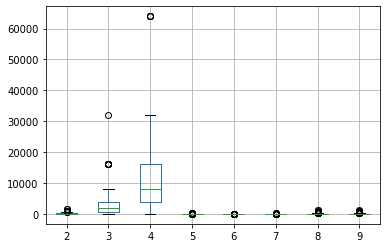

In [22]:
data.boxplot(column=[e for e in range(2, 10)])

In [23]:
normalData = (data - data.mean()) / data.std()
normalData.head()

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  """Entry point for launching an IPython kernel.


,0,1,2,3,4,5,6,7,8,9
0,NaN,NaN,-0.302859,-0.673409,-0.494275,5.680569,1.658008,4.220899,0.574380,0.644041
1,NaN,NaN,-0.671717,1.323114,1.722913,0.167228,0.484346,0.528211,1.015838,0.992975
2,NaN,NaN,-0.671717,1.323114,1.722913,0.167228,0.484346,0.528211,0.711170,0.992975
3,NaN,NaN,-0.671717,1.323114,1.722913,0.167228,0.484346,0.528211,0.412720,0.992975
4,NaN,NaN,-0.671717,1.323114,0.358489,0.167228,0.484346,-0.087238,0.164011,0.211104


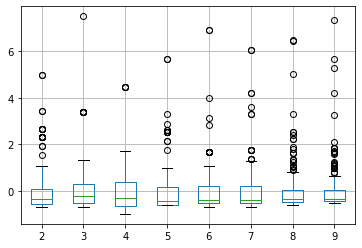

In [24]:
normalData.boxplot(column=[e for e in range(2, 10)])

### Get rid of outliers

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:6: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  


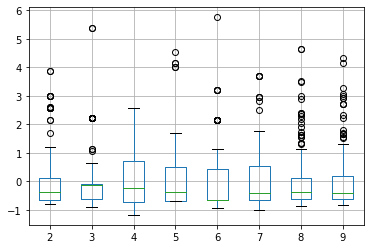

In [25]:
data1 = data.copy()
for i in range(2, 10):
  lim = data1[i].quantile(0.99)
  data1 = data1[data1[i] <= lim]

normalData1 = (data1 - data1.mean()) /data1.std()

normalData1.boxplot(column=[e for e in range(2, 10)])

In [26]:
normalData.describe()

,2,3,4,5,6,7,8,9
count,2.090000e+02,2.090000e+02,2.090000e+02,2.090000e+02,2.090000e+02,2.090000e+02,2.090000e+02,2.090000e+02
mean,-4.249658e-18,-8.499315e-18,8.924281e-17,3.399726e-17,-6.799452e-17,-2.549795e-17,-2.284191e-17,4.887106e-17
std,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00
min,-7.178240e-01,-7.229097e-01,-1.000477e+00,-6.203922e-01,-6.893157e-01,-7.026857e-01,-6.194215e-01,-5.449194e-01
25%,-5.910291e-01,-5.414076e-01,-6.648284e-01,-6.203922e-01,-5.426080e-01,-5.103581e-01,-4.888494e-01,-4.609168e-01
50%,-3.604930e-01,-2.237789e-01,-3.237225e-01,-4.234871e-01,-3.959003e-01,-3.949616e-01,-3.458419e-01,-3.510672e-01
75%,8.136785e-02,2.918521e-01,3.584892e-01,1.672280e-01,1.909306e-01,2.204865e-01,4.587426e-02,1.079018e-02
max,4.980260e+00,7.510686e+00,4.451760e+00,5.680569e+00,6.939486e+00,6.067243e+00,6.493647e+00,7.357787e+00


In [27]:
normalData1.describe()

,2,3,4,5,6,7,8,9
count,1.920000e+02,1.920000e+02,1.920000e+02,1.920000e+02,1.920000e+02,192.000000,1.920000e+02,1.920000e+02
mean,1.850372e-17,-8.326673e-17,-2.081668e-17,1.387779e-17,-6.013708e-17,0.000000,7.401487e-17,6.938894e-17
std,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000,1.000000e+00,1.000000e+00
min,-7.913488e-01,-8.905955e-01,-1.176738e+00,-6.829336e-01,-9.201415e-01,-1.007144,-8.539596e-01,-8.130005e-01
25%,-6.496147e-01,-6.131046e-01,-7.136000e-01,-6.829336e-01,-6.633578e-01,-0.640076,-6.138479e-01,-6.234191e-01
50%,-3.704414e-01,-1.274954e-01,-2.429313e-01,-3.886053e-01,-6.633578e-01,-0.419835,-3.857419e-01,-4.040995e-01
75%,1.181118e-01,-9.793315e-02,6.984062e-01,4.943795e-01,4.279728e-01,0.534543,1.244954e-01,1.720792e-01
max,3.860107e+00,5.390791e+00,2.581081e+00,4.541394e+00,5.756234e+00,3.691333,4.656603e+00,4.331717e+00


In [28]:
import seaborn as sns
plt.style.use("seaborn")
sns.set_style("whitegrid")
sns.set(font="Liberation Sans")
sns.set(font_scale=1.6)

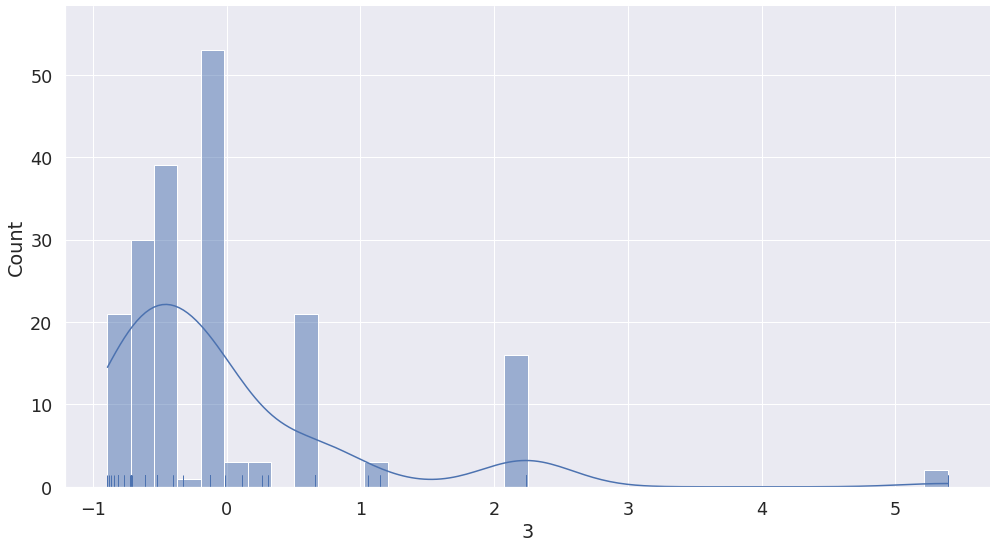

In [29]:
sns.displot(data=normalData1, x=3, kde=True, height=8, aspect=16/9, rug=True)

### Correlaciones

In [30]:
normalData1.corr()

,2,3,4,5,6,7,8,9
2,1.000000,-0.398984,-0.404122,-0.356705,-0.362801,-0.331743,-0.391086,-0.399845
3,-0.398984,1.000000,0.715785,0.470867,0.540394,0.299641,0.793805,0.850606
4,-0.404122,0.715785,1.000000,0.449003,0.469892,0.384644,0.761615,0.921366
5,-0.356705,0.470867,0.449003,1.000000,0.496999,0.398560,0.705953,0.635412
6,-0.362801,0.540394,0.469892,0.496999,1.000000,0.502722,0.606034,0.604011
7,-0.331743,0.299641,0.384644,0.398560,0.502722,1.000000,0.427988,0.436894
8,-0.391086,0.793805,0.761615,0.705953,0.606034,0.427988,1.000000,0.906393
9,-0.399845,0.850606,0.921366,0.635412,0.604011,0.436894,0.906393,1.000000


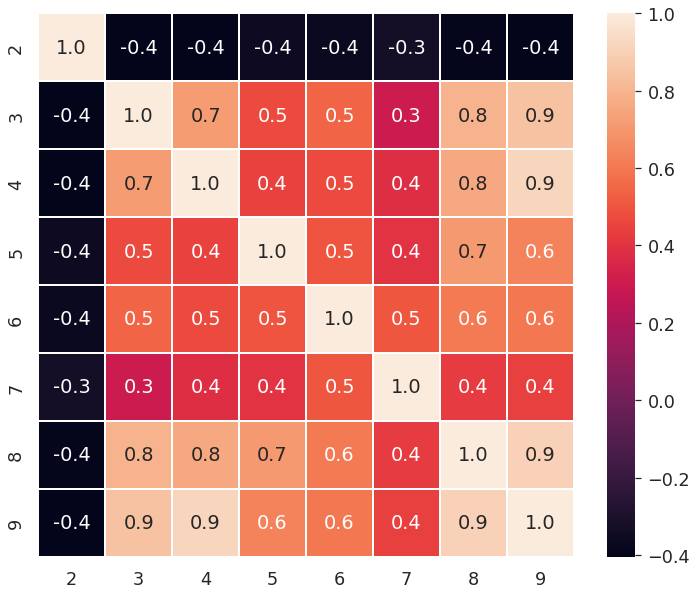

In [31]:
f, ax = plt.subplots(figsize=(12, 10))
sns.heatmap(normalData1.corr(), annot=True, linewidth=.5, fmt=".1f", ax=ax)